In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('dados/t_asv.csv')
df.head(10)

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heavens and t...
1,1001002,1,1,2,And the earth was waste and void; and darkness...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
5,1001006,1,1,6,"And God said, Let there be a firmament in the ..."
6,1001007,1,1,7,"And God made the firmament, and divided the wa..."
7,1001008,1,1,8,And God called the firmament Heaven. And there...
8,1001009,1,1,9,"And God said, Let the waters under the heavens..."
9,1001010,1,1,10,And God called the dry land Earth; and the gat...


In [4]:
def lower_column_t(data):
    values = data['t']
    values = values.lower()
    data['t'] = values
    return data

In [5]:
df = df.apply(lower_column_t, axis=1)
df.head(10)

,id,b,c,v,t
0,1001001,1,1,1,in the beginning god created the heavens and t...
1,1001002,1,1,2,and the earth was waste and void; and darkness...
2,1001003,1,1,3,"and god said, let there be light: and there wa..."
3,1001004,1,1,4,"and god saw the light, that it was good: and g..."
4,1001005,1,1,5,"and god called the light day, and the darkness..."
5,1001006,1,1,6,"and god said, let there be a firmament in the ..."
6,1001007,1,1,7,"and god made the firmament, and divided the wa..."
7,1001008,1,1,8,and god called the firmament heaven. and there...
8,1001009,1,1,9,"and god said, let the waters under the heavens..."
9,1001010,1,1,10,and god called the dry land earth; and the gat...


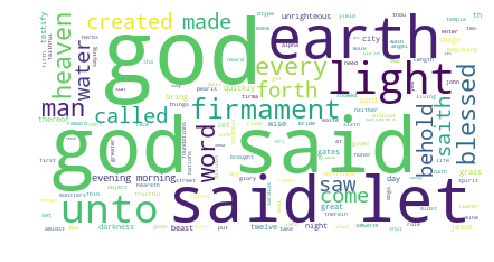

In [6]:
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df['t']))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
import codecs
import os
import pandas as pd
import numpy as np
import regex
from collections import Counter
import tqdm as tqdm

#loading in the text from both versions of the bible
new_bib = pd.read_csv("dados/t_web.csv").t
old_bib = pd.read_csv("dados/t_kjv.csv").t

In [39]:
% cd /kaggle/input/tensorflow-transformer/repository/Kyubyong-transformer-ed2deb8/

[WinError 3] O sistema não pode encontrar o caminho especificado: '/kaggle/input/tensorflow-transformer/repository/Kyubyong-transformer-ed2deb8/'
C:\Users\marcu\Documents\GitHub\NLP


In [40]:
# this chunk from Kaggle User ryches
# original kerenl here https://www.kaggle.com/ryches/newbib2oldbib

# a regex to remove the curly braces and the notes inside them. 
def remove_notes(notes):
    return regex.sub("[\{\[].*?[\}\]]", "", notes)

# remove notes from the bible text
new_bib = new_bib.apply(remove_notes)
old_bib = old_bib.apply(remove_notes)

In [41]:
# this line is blank in the king james version
print(new_bib[30673])
print(old_bib[30673])

# cleaned data
old_bib_cleaned = old_bib.drop([30673])

Jude, a servant of Jesus Christ, and brother of James, to those who are called, sanctified by God the Father, and kept for Jesus Christ:



In [42]:
os.mkdir("../../../logdir")

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: '../../../logdir'

In [43]:
class Hyperparams:
    '''Hyperparameters'''
    # data
    source_train = new_bib[0:30000]
    target_train = old_bib_cleaned[0:30000]
    source_test = new_bib[30000:]
    target_test = old_bib_cleaned[30000:]
    
    # training
    batch_size = 32 # alias = N
    lr = 0.0001 # learning rate. In paper, learning rate is adjusted to the global step.
    logdir = "../../../logdir" # log directory
    
    # model
    maxlen = 50 # Maximum number of words in a sentence. alias = T.
                # Feel free to increase this if you are ambitious.
    min_cnt = 2 # words whose occurred less than min_cnt are encoded as <UNK>.
    hidden_units = 300 # alias = C
    num_blocks = 6 # number of encoder/decoder blocks
    num_epochs = 1
    num_heads = 10
    dropout_rate = 0.1
    sinusoid = False # If True, use sinusoid. If false, positional embedding.

In [44]:
def make_vocab(fname, text):
    '''Constructs vocabulary.
    
    Args:
      fpath: A string. Input file path.
      fname: A string. Output file name.
    
    Writes vocabulary line by line to `preprocessed/fname`
    '''  
    text = regex.sub("[^\s\p{Latin}']", "", text)
    words = text.split()
    word2cnt = word_index
    if not os.path.exists('/kaggle/working/preprocessed'): 
        os.mkdir('/kaggle/working/preprocessed')
    with codecs.open('/kaggle/working/preprocessed/{}'.format(fname), 'w', 'utf-8') as fout:
        fout.write("{}\t100000\n{}\t100000\n{}\t100000\n{}\t100000\n".format("<PAD>", "<UNK>", "<S>", "</S>"))
        for word, cnt in word2cnt.items():
            fout.write(u"{}\t{}\n".format(word, cnt))

In [45]:
os.mkdir('preprocecessed')

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'preprocecessed'

In [46]:

import tensorflow as tf
import numpy as np
import codecs
import regex

# load source vocab
def load_de_vocab():
    word2idx, idx2word = vocab_set, index_set
    return word2idx, idx2word

# load target vocab
def load_en_vocab():
    word2idx, idx2word = vocab_set, index_set
    return word2idx, idx2word

def create_data(source_sents, target_sents):
    print(len(source_sents))
    de2idx, idx2de = load_de_vocab()
    en2idx, idx2en = load_en_vocab()
    
    # Index
    x_list, y_list, Sources, Targets = [], [], [], []
    for source_sent, target_sent in zip(source_sents, target_sents):
        x = [de2idx.get(word, 1) for word in (source_sent + u" </S>").split()] # 1: OOV, </S>: End of Text
        y = [en2idx.get(word, 1) for word in (target_sent + u" </S>").split()] 
        if max(len(x), len(y)) <=hp.maxlen:
            x_list.append(np.array(x))
            y_list.append(np.array(y))
            Sources.append(source_sent)
            Targets.append(target_sent)
    # Pad   
    X = np.zeros([len(x_list), hp.maxlen], np.int32)
    Y = np.zeros([len(y_list), hp.maxlen], np.int32)
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        X[i] = np.lib.pad(x, [0, hp.maxlen-len(x)], 'constant', constant_values=(0, 0))
        Y[i] = np.lib.pad(y, [0, hp.maxlen-len(y)], 'constant', constant_values=(0, 0))
    
    return X, Y, Sources, Targets

def load_train_data():
    de_sents = hp.source_train
    en_sents = hp.target_train
    
    X, Y, Sources, Targets = create_data(de_sents, en_sents)
    return X, Y
    
def load_test_data():
    def _refine(line):
        line = regex.sub("<[^>]+>", "", line)
        line = regex.sub("[^\s\p{Latin}']", "", line) 
        return line.strip()
    
    de_sents = hp.source_test
    en_sents = hp.target_test
    
    X, Y, Sources, Targets = create_data(de_sents, en_sents)
    return X, Sources, Targets # (1064, 150)

def get_batch_data():
    # Load data
    X, Y = load_train_data()
    
    # calc total batch count
    num_batch = len(X) // hp.batch_size
    
    # Convert to tensor
    X = tf.convert_to_tensor(X, tf.int32)
    Y = tf.convert_to_tensor(Y, tf.int32)
    
    # Create Queues
    input_queues = tf.train.slice_input_producer([X, Y])
            
    # create batch queues
    x, y = tf.train.shuffle_batch(input_queues,
                                num_threads=8,
                                batch_size=hp.batch_size, 
                                capacity=hp.batch_size*64,   
                                min_after_dequeue=hp.batch_size*32, 
                                allow_smaller_final_batch=False)
    
    return x, y, num_batch # (N, T), (N, T), ()

In [47]:
import gensim
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lc = LancasterStemmer()
from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")

spell_model = gensim.models.KeyedVectors.load_word2vec_format('dados/wiki-news-300d-1M.vec')
words = spell_model.index2word
word_index = {}
index_word = {}
for i,word in enumerate(words):
    word_index[word] = i
    index_word[i] = word

In [48]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters = '', lower = False)
tokenizer.fit_on_texts(list(old_bib_cleaned.str.lower() + list(new_bib.str.lower())))
vocab_set = tokenizer.word_index
index_set = tokenizer.index_word

In [49]:
# Use fast text as vocabulary
def words(text): return re.findall(r'\w+', text.lower())
def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - word_index.get(word, 0)
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or [word])
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in word_index)
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
def singlify(word):
    return "".join([letter for i,letter in enumerate(word) if i == 0 or letter != word[i-1]])

def load_fasttext(word_dict):
    EMBEDDING_FILE =  'dados/wiki-news-300d-1M.vec'
    def get_coefs(word,*arr): 
        return word, np.asarray(arr[:-1], dtype='float32')
#     embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in (open(EMBEDDING_FILE, encoding = "utf8")) if o.split(" ")[0] in word_dict) 
    embed_size = 300
    nb_words = len(word_dict)+1
    embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
    unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
    print(unknown_vector[:5])
    for key in word_dict:
        word = key
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.lower()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.upper()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.capitalize()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = ps.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lc.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = sb.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        if len(key) > 1:
            word = correction(key)
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[word_dict[key]] = embedding_vector
                continue
        embedding_matrix[word_dict[key]] = unknown_vector                    
    return embedding_matrix, nb_words 
embedding_matrix, nb_words = load_fasttext(vocab_set)

[-1. -1. -1. -1. -1.]


In [50]:
embedding_matrix.shape

(58589, 300)

In [51]:

from __future__ import print_function
import tensorflow as tf

def normalize(inputs, 
              epsilon = 1e-8,
              scope="ln",
              reuse=None):
    '''Applies layer normalization.
    
    Args:
      inputs: A tensor with 2 or more dimensions, where the first dimension has
        `batch_size`.
      epsilon: A floating number. A very small number for preventing ZeroDivision Error.
      scope: Optional scope for `variable_scope`.
      reuse: Boolean, whether to reuse the weights of a previous layer
        by the same name.
      
    Returns:
      A tensor with the same shape and data dtype as `inputs`.
    '''
    with tf.variable_scope(scope, reuse=reuse):
        inputs_shape = inputs.get_shape()
        params_shape = inputs_shape[-1:]
    
        mean, variance = tf.nn.moments(inputs, [-1], keep_dims=True)
        beta= tf.Variable(tf.zeros(params_shape))
        gamma = tf.Variable(tf.ones(params_shape))
        normalized = (inputs - mean) / ( (variance + epsilon) ** (.5) )
        outputs = gamma * normalized + beta
        
    return outputs

def embedding(inputs, 
              vocab_size, 
              num_units, 
              zero_pad=True, 
              scale=True,
              scope="embedding", 
              reuse=None):
    '''Embeds a given tensor.
    Args:
      inputs: A `Tensor` with type `int32` or `int64` containing the ids
         to be looked up in `lookup table`.
      vocab_size: An int. Vocabulary size.
      num_units: An int. Number of embedding hidden units.
      zero_pad: A boolean. If True, all the values of the fist row (id 0)
        should be constant zeros.
      scale: A boolean. If True. the outputs is multiplied by sqrt num_units.
      scope: Optional scope for `variable_scope`.
      reuse: Boolean, whether to reuse the weights of a previous layer
        by the same name.
    Returns:
      A `Tensor` with one more rank than inputs's. The last dimensionality
        should be `num_units`.
        
    For example,
    
    ```
    import tensorflow as tf
    
    inputs = tf.to_int32(tf.reshape(tf.range(2*3), (2, 3)))
    outputs = embedding(inputs, 6, 2, zero_pad=True)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print sess.run(outputs)
    >>
    [[[ 0.          0.        ]
      [ 0.09754146  0.67385566]
      [ 0.37864095 -0.35689294]]
     [[-1.01329422 -1.09939694]
      [ 0.7521342   0.38203377]
      [-0.04973143 -0.06210355]]]
    ```
    
    ```
    import tensorflow as tf
    
    inputs = tf.to_int32(tf.reshape(tf.range(2*3), (2, 3)))
    outputs = embedding(inputs, 6, 2, zero_pad=False)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print sess.run(outputs)
    >>
    [[[-0.19172323 -0.39159766]
      [-0.43212751 -0.66207761]
      [ 1.03452027 -0.26704335]]
     [[-0.11634696 -0.35983452]
      [ 0.50208133  0.53509563]
      [ 1.22204471 -0.96587461]]]    
    ```    
    '''
    with tf.variable_scope(scope, reuse=reuse):
        lookup_table = tf.get_variable('lookup_table',
                                       dtype=tf.float32,
                                       shape=[nb_words, num_units],
                                       initializer=tf.constant_initializer(np.array(embedding_matrix)))
        if zero_pad:
            lookup_table = tf.concat((tf.zeros(shape=[1, num_units]),
                                      lookup_table[1:, :]), 0)
        outputs = tf.nn.embedding_lookup(lookup_table, inputs)
        
        if scale:
            outputs = outputs * (num_units ** 0.5) 
            
    return outputs
    

def positional_encoding(inputs,
                        num_units,
                        zero_pad=True,
                        scale=True,
                        scope="positional_encoding",
                        reuse=None):
    '''Sinusoidal Positional_Encoding.
    Args:
      inputs: A 2d Tensor with shape of (N, T).
      num_units: Output dimensionality
      zero_pad: Boolean. If True, all the values of the first row (id = 0) should be constant zero
      scale: Boolean. If True, the output will be multiplied by sqrt num_units(check details from paper)
      scope: Optional scope for `variable_scope`.
      reuse: Boolean, whether to reuse the weights of a previous layer
        by the same name.
    Returns:
        A 'Tensor' with one more rank than inputs's, with the dimensionality should be 'num_units'
    '''

    N, T = inputs.get_shape().as_list()
    with tf.variable_scope(scope, reuse=reuse):
        position_ind = tf.tile(tf.expand_dims(tf.range(T), 0), [N, 1])

        # First part of the PE function: sin and cos argument
        position_enc = np.array([
            [pos / np.power(10000, 2.*i/num_units) for i in range(num_units)]
            for pos in range(T)])

        # Second part, apply the cosine to even columns and sin to odds.
        position_enc[:, 0::2] = np.sin(position_enc[:, 0::2])  # dim 2i
        position_enc[:, 1::2] = np.cos(position_enc[:, 1::2])  # dim 2i+1

        # Convert to a tensor
        lookup_table = tf.convert_to_tensor(position_enc)

        if zero_pad:
            lookup_table = tf.concat((tf.zeros(shape=[1, num_units]),
                                      lookup_table[1:, :]), 0)
        outputs = tf.nn.embedding_lookup(lookup_table, position_ind)

        if scale:
            outputs = outputs * num_units**0.5

        return outputs



def multihead_attention(queries, 
                        keys, 
                        num_units=None, 
                        num_heads=8, 
                        dropout_rate=0,
                        is_training=True,
                        causality=False,
                        scope="multihead_attention", 
                        reuse=None):
    '''Applies multihead attention.
    
    Args:
      queries: A 3d tensor with shape of [N, T_q, C_q].
      keys: A 3d tensor with shape of [N, T_k, C_k].
      num_units: A scalar. Attention size.
      dropout_rate: A floating point number.
      is_training: Boolean. Controller of mechanism for dropout.
      causality: Boolean. If true, units that reference the future are masked. 
      num_heads: An int. Number of heads.
      scope: Optional scope for `variable_scope`.
      reuse: Boolean, whether to reuse the weights of a previous layer
        by the same name.
        
    Returns
      A 3d tensor with shape of (N, T_q, C)  
    '''
    with tf.variable_scope(scope, reuse=reuse):
        # Set the fall back option for num_units
        if num_units is None:
            num_units = queries.get_shape().as_list()[-1]
        
        # Linear projections
        Q = tf.layers.dense(queries, num_units, activation=tf.nn.relu) # (N, T_q, C)
        K = tf.layers.dense(keys, num_units, activation=tf.nn.relu) # (N, T_k, C)
        V = tf.layers.dense(keys, num_units, activation=tf.nn.relu) # (N, T_k, C)
        
        # Split and concat
        Q_ = tf.concat(tf.split(Q, num_heads, axis=2), axis=0) # (h*N, T_q, C/h) 
        K_ = tf.concat(tf.split(K, num_heads, axis=2), axis=0) # (h*N, T_k, C/h) 
        V_ = tf.concat(tf.split(V, num_heads, axis=2), axis=0) # (h*N, T_k, C/h) 

        # Multiplication
        outputs = tf.matmul(Q_, tf.transpose(K_, [0, 2, 1])) # (h*N, T_q, T_k)
        
        # Scale
        outputs = outputs / (K_.get_shape().as_list()[-1] ** 0.5)
        
        # Key Masking
        key_masks = tf.sign(tf.reduce_sum(tf.abs(keys), axis=-1)) # (N, T_k)
        key_masks = tf.tile(key_masks, [num_heads, 1]) # (h*N, T_k)
        key_masks = tf.tile(tf.expand_dims(key_masks, 1), [1, tf.shape(queries)[1], 1]) # (h*N, T_q, T_k)
        
        paddings = tf.ones_like(outputs)*(-2**32+1)
        outputs = tf.where(tf.equal(key_masks, 0), paddings, outputs) # (h*N, T_q, T_k)
  
        # Causality = Future blinding
        if causality:
            diag_vals = tf.ones_like(outputs[0, :, :]) # (T_q, T_k)
            tril = tf.linalg.LinearOperatorLowerTriangular(diag_vals).to_dense() # (T_q, T_k)
            masks = tf.tile(tf.expand_dims(tril, 0), [tf.shape(outputs)[0], 1, 1]) # (h*N, T_q, T_k)
   
            paddings = tf.ones_like(masks)*(-2**32+1)
            outputs = tf.where(tf.equal(masks, 0), paddings, outputs) # (h*N, T_q, T_k)
  
        # Activation
        outputs = tf.nn.softmax(outputs) # (h*N, T_q, T_k)
         
        # Query Masking
        query_masks = tf.sign(tf.reduce_sum(tf.abs(queries), axis=-1)) # (N, T_q)
        query_masks = tf.tile(query_masks, [num_heads, 1]) # (h*N, T_q)
        query_masks = tf.tile(tf.expand_dims(query_masks, -1), [1, 1, tf.shape(keys)[1]]) # (h*N, T_q, T_k)
        outputs *= query_masks # broadcasting. (N, T_q, C)
          
        # Dropouts
        outputs = tf.layers.dropout(outputs, rate=dropout_rate, training=tf.convert_to_tensor(is_training))
               
        # Weighted sum
        outputs = tf.matmul(outputs, V_) # ( h*N, T_q, C/h)
        
        # Restore shape
        outputs = tf.concat(tf.split(outputs, num_heads, axis=0), axis=2 ) # (N, T_q, C)
              
        # Residual connection
        outputs += queries
              
        # Normalize
        outputs = normalize(outputs) # (N, T_q, C)
 
    return outputs

def feedforward(inputs, 
                num_units=[2048, 512],
                scope="multihead_attention", 
                reuse=None):
    '''Point-wise feed forward net.
    
    Args:
      inputs: A 3d tensor with shape of [N, T, C].
      num_units: A list of two integers.
      scope: Optional scope for `variable_scope`.
      reuse: Boolean, whether to reuse the weights of a previous layer
        by the same name.
        
    Returns:
      A 3d tensor with the same shape and dtype as inputs
    '''
    with tf.variable_scope(scope, reuse=reuse):
        # Inner layer
        params = {"inputs": inputs, "filters": num_units[0], "kernel_size": 1,
                  "activation": tf.nn.relu, "use_bias": True}
        outputs = tf.layers.conv1d(**params)
        
        # Readout layer
        params = {"inputs": outputs, "filters": num_units[1], "kernel_size": 1,
                  "activation": None, "use_bias": True}
        outputs = tf.layers.conv1d(**params)
        
        # Residual connection
        outputs += inputs
        
        # Normalize
        outputs = normalize(outputs)
    
    return outputs

def label_smoothing(inputs, epsilon=0.1):
    '''Applies label smoothing. See https://arxiv.org/abs/1512.00567.
    
    Args:
      inputs: A 3d tensor with shape of [N, T, V], where V is the number of vocabulary.
      epsilon: Smoothing rate.
    
    For example,
    
    ```
    import tensorflow as tf
    inputs = tf.convert_to_tensor([[[0, 0, 1], 
       [0, 1, 0],
       [1, 0, 0]],
      [[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]]], tf.float32)
       
    outputs = label_smoothing(inputs)
    
    with tf.Session() as sess:
        print(sess.run([outputs]))
    
    >>
    [array([[[ 0.03333334,  0.03333334,  0.93333334],
        [ 0.03333334,  0.93333334,  0.03333334],
        [ 0.93333334,  0.03333334,  0.03333334]],
       [[ 0.93333334,  0.03333334,  0.03333334],
        [ 0.93333334,  0.03333334,  0.03333334],
        [ 0.03333334,  0.93333334,  0.03333334]]], dtype=float32)]   
    ```    
    '''
    K = inputs.get_shape().as_list()[-1] # number of channels
    return ((1-epsilon) * inputs) + (epsilon / K)

In [52]:
from __future__ import print_function
import tensorflow as tf
from tqdm import tqdm

from hyperparams import *
hp = hyperparams
## TODO: rewrite "load___vocab" fucntions to work with our
# file system
# from data_load import get_batch_data
# this is the meat of the transformer code, hoepfully
# can just use as is
#from modules import *
import os, codecs


class Graph():
    def __init__(self, is_training=True):
        self.graph = tf.Graph()
        with self.graph.as_default():
            with tf.device("/device:GPU:0"):
                if is_training:
                    self.x, self.y, self.num_batch = get_batch_data() # (N, T)
                else: # inference
                    self.x = tf.placeholder(tf.int32, shape=(None, hp.maxlen))
                    self.y = tf.placeholder(tf.int32, shape=(None, hp.maxlen))

                # define decoder inputs
                self.decoder_inputs = tf.concat((tf.ones_like(self.y[:, :1])*2, self.y[:, :-1]), -1) # 2:<S>

                # Load vocabulary    
                de2idx, idx2de = load_de_vocab()
                en2idx, idx2en = load_en_vocab()

                # Encoder
                with tf.variable_scope("encoder"):
                    ## Embedding
                    self.enc = embedding(self.x, 
                                          vocab_size=len(de2idx), 
                                          num_units=hp.hidden_units, 
                                          scale=True,
                                          scope="enc_embed")

                    ## Positional Encoding
                    if hp.sinusoid:
                        self.enc += positional_encoding(self.x,
                                          num_units=hp.hidden_units, 
                                          zero_pad=False, 
                                          scale=False,
                                          scope="enc_pe")
                    else:
                        self.enc += embedding(tf.tile(tf.expand_dims(tf.range(tf.shape(self.x)[1]), 0), [tf.shape(self.x)[0], 1]),
                                          vocab_size=hp.maxlen, 
                                          num_units=hp.hidden_units, 
                                          zero_pad=False, 
                                          scale=False,
                                          scope="enc_pe")


                    ## Dropout
                    self.enc = tf.layers.dropout(self.enc, 
                                                rate=hp.dropout_rate, 
                                                training=tf.convert_to_tensor(is_training))

                    ## Blocks
                    for i in range(hp.num_blocks):
                        with tf.variable_scope("num_blocks_{}".format(i)):
                            ### Multihead Attention
                            self.enc = multihead_attention(queries=self.enc, 
                                                            keys=self.enc, 
                                                            num_units=hp.hidden_units, 
                                                            num_heads=hp.num_heads, 
                                                            dropout_rate=hp.dropout_rate,
                                                            is_training=is_training,
                                                            causality=False)

                            ### Feed Forward
                            self.enc = feedforward(self.enc, num_units=[4*hp.hidden_units, hp.hidden_units])

                # Decoder
                with tf.variable_scope("decoder"):
                    ## Embedding
                    self.dec = embedding(self.decoder_inputs, 
                                          vocab_size=len(en2idx), 
                                          num_units=hp.hidden_units,
                                          scale=True, 
                                          scope="dec_embed")

                    ## Positional Encoding
                    if hp.sinusoid:
                        self.dec += positional_encoding(self.decoder_inputs,
                                          vocab_size=hp.maxlen, 
                                          num_units=hp.hidden_units, 
                                          zero_pad=False, 
                                          scale=False,
                                          scope="dec_pe")
                    else:
                        self.dec += embedding(tf.tile(tf.expand_dims(tf.range(tf.shape(self.decoder_inputs)[1]), 0), [tf.shape(self.decoder_inputs)[0], 1]),
                                          vocab_size=hp.maxlen, 
                                          num_units=hp.hidden_units, 
                                          zero_pad=False, 
                                          scale=False,
                                          scope="dec_pe")

                    ## Dropout
                    self.dec = tf.layers.dropout(self.dec, 
                                                rate=hp.dropout_rate, 
                                                training=tf.convert_to_tensor(is_training))

                    ## Blocks
                    for i in range(hp.num_blocks):
                        with tf.variable_scope("num_blocks_{}".format(i)):
                            ## Multihead Attention ( self-attention)
                            self.dec = multihead_attention(queries=self.dec, 
                                                            keys=self.dec, 
                                                            num_units=hp.hidden_units, 
                                                            num_heads=hp.num_heads, 
                                                            dropout_rate=hp.dropout_rate,
                                                            is_training=is_training,
                                                            causality=True, 
                                                            scope="self_attention")

                            ## Multihead Attention ( vanilla attention)
                            self.dec = multihead_attention(queries=self.dec, 
                                                            keys=self.enc, 
                                                            num_units=hp.hidden_units, 
                                                            num_heads=hp.num_heads,
                                                            dropout_rate=hp.dropout_rate,
                                                            is_training=is_training, 
                                                            causality=False,
                                                            scope="vanilla_attention")

                            ## Feed Forward
                            self.dec = feedforward(self.dec, num_units=[4*hp.hidden_units, hp.hidden_units])

                # Final linear projection
                self.logits = tf.layers.dense(self.dec, len(en2idx))
                self.preds = tf.to_int32(tf.arg_max(self.logits, dimension=-1))
                self.istarget = tf.to_float(tf.not_equal(self.y, 0))
                self.acc = tf.reduce_sum(tf.to_float(tf.equal(self.preds, self.y))*self.istarget)/ (tf.reduce_sum(self.istarget))
                tf.summary.scalar('acc', self.acc)

                if is_training:  
                    # Loss
                    self.y_smoothed = label_smoothing(tf.one_hot(self.y, depth=len(en2idx)))
                    self.loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.y_smoothed)
                    self.mean_loss = tf.reduce_sum(self.loss*self.istarget) / (tf.reduce_sum(self.istarget))

                    # Training Scheme
                    self.global_step = tf.Variable(0, name='global_step', trainable=False)
                    self.optimizer = tf.train.AdamOptimizer(learning_rate=hp.lr, beta1=0.9, beta2=0.98, epsilon=1e-8)
                    self.train_op = self.optimizer.minimize(self.mean_loss, global_step=self.global_step)

                    # Summary 
                    tf.summary.scalar('mean_loss', self.mean_loss)
                    self.merged = tf.summary.merge_all()

if __name__ == '__main__':                
    # Load vocabulary    
    de2idx, idx2de = load_de_vocab()
    en2idx, idx2en = load_en_vocab()
    
    # Construct graph
    with tf.device('/gpu:0'):
        g = Graph("train"); print("Graph loaded")

    # Start session
    sv = tf.train.Supervisor(graph=g.graph, 
                             logdir=hp.logdir,
                             save_model_secs=0)
    with sv.managed_session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
        for epoch in range(1, hp.num_epochs+1):
            print(epoch)
            if sv.should_stop(): break
            for step in tqdm(range(g.num_batch), total=g.num_batch, ncols=70, leave=False, unit='b'):
                sess.run(g.train_op)

            gs = sess.run(g.global_step)   
            sv.saver.save(sess, hp.logdir + '/model_epoch_%02d_gs_%d' % (epoch, gs))
    
    print("Done")

ModuleNotFoundError: No module named 'hyperparams'